In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [39]:
brain = cv2.imread('MRI.jpg')
brain = cv2.cvtColor(brain,cv2.COLOR_BGR2GRAY)

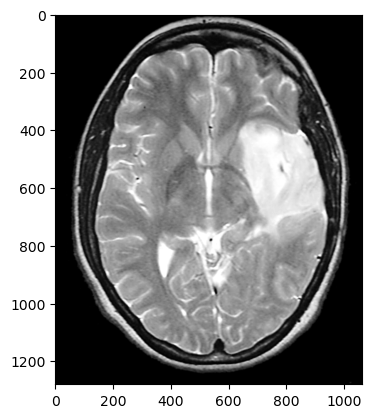

In [40]:
plt.imshow(brain,cmap='gray')

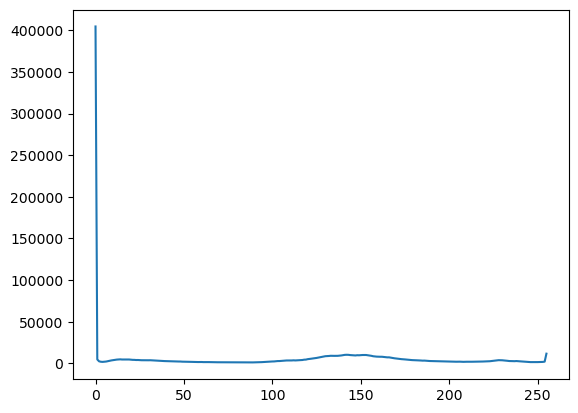

In [41]:
hist = cv2.calcHist([brain], [0], None, [256], [0, 256])
plt.plot(hist)

In [42]:
hist, bins = np.histogram(brain.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

threshold = np.argmax(cdf_normalized > 0.95 * cdf_normalized.max())

ret, thresh = cv2.threshold(brain, threshold, 255, cv2.THRESH_BINARY)

In [43]:
print('Threshold:',threshold,'- 255')

Threshold: 229 - 255


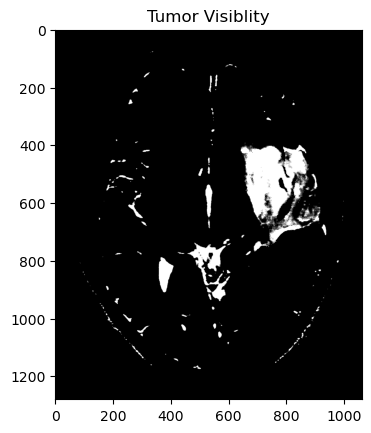

In [44]:
plt.title('Tumor Visiblity')
plt.imshow(thresh,cmap='gray')

In [45]:
adaptive_mean= cv2.adaptiveThreshold(brain, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
adaptive_gaussian = cv2.adaptiveThreshold(brain, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

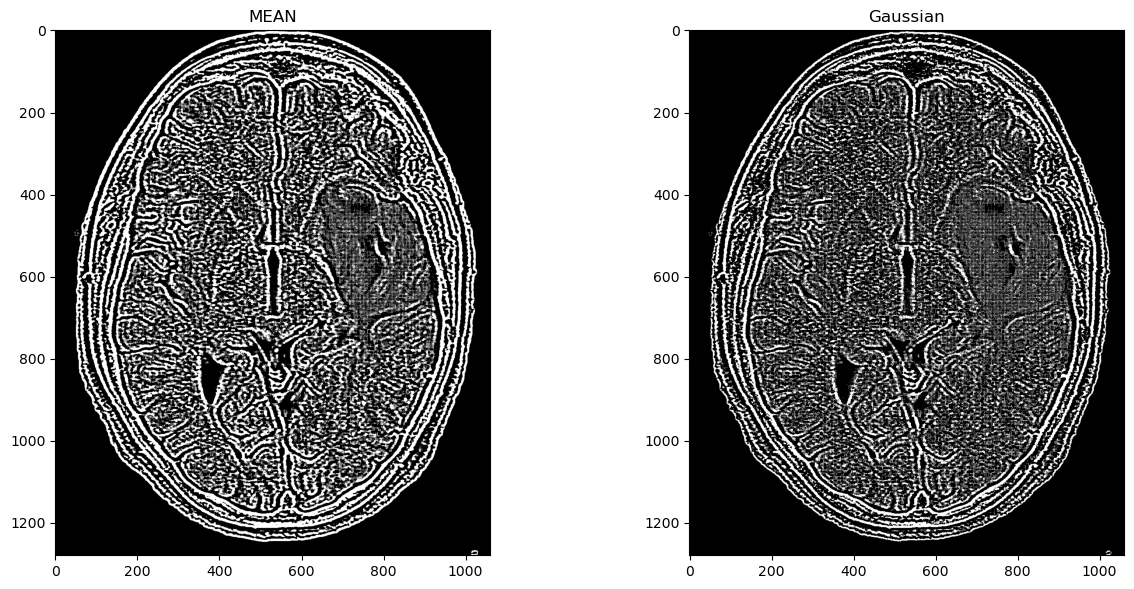

In [46]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('MEAN')
plt.imshow(adaptive_mean,cmap='gray')
plt.subplot(2,2,2)
plt.title('Gaussian')
plt.imshow(adaptive_gaussian,cmap='gray')

#### Threshold using OTSU & Noise Removal

In [92]:
# Thresholding
ret, thresh = cv2.threshold(brain, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Noise Removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 4)

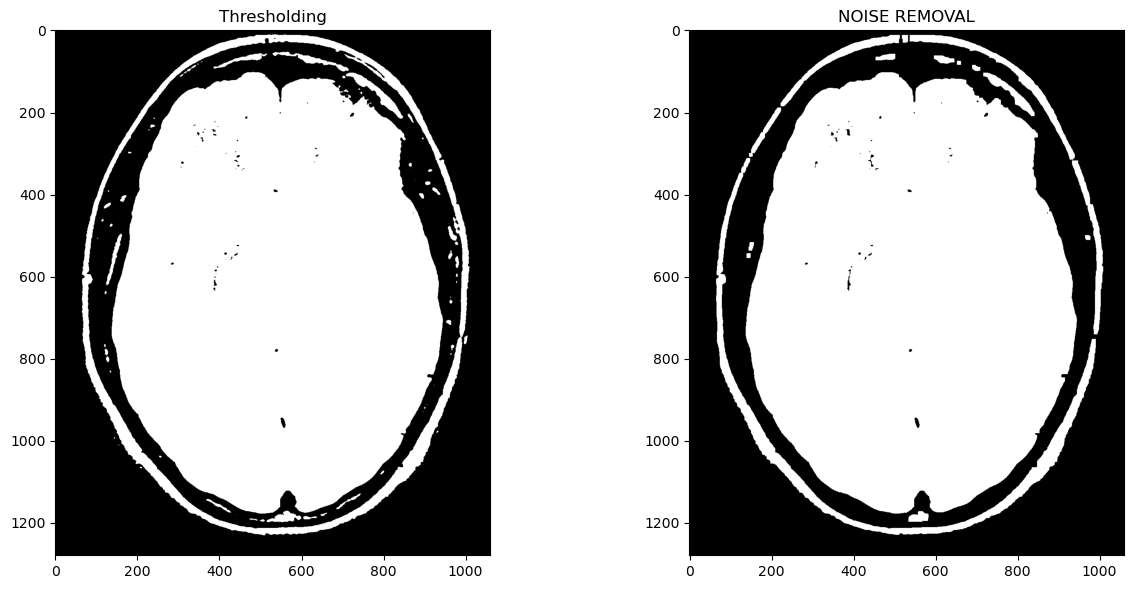

In [93]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Thresholding')
plt.imshow(thresh,cmap='gray')
plt.subplot(2,2,2)
plt.title('NOISE REMOVAL')
plt.imshow(opening,cmap='gray')

In [102]:
# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

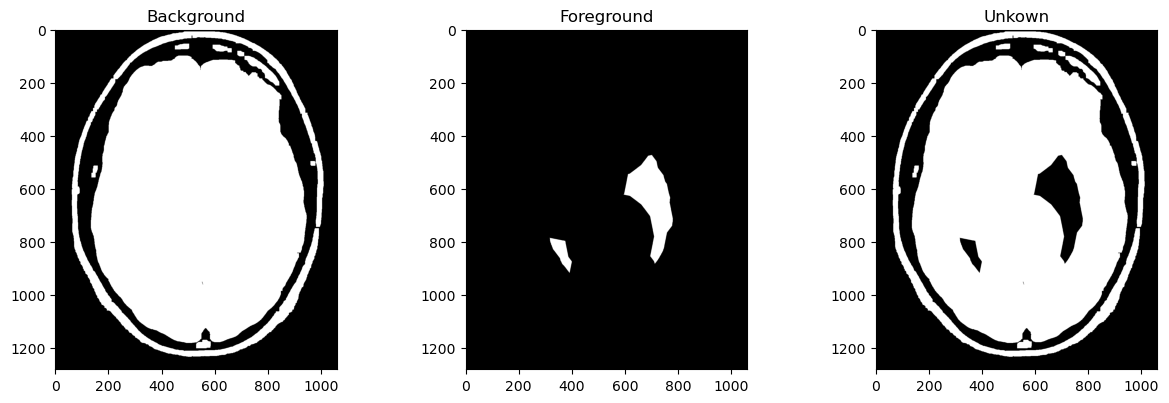

In [103]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Background')
plt.imshow(sure_bg,cmap='gray')
plt.subplot(3,3,2)
plt.title('Foreground')
plt.imshow(sure_fg,cmap='gray')
plt.subplot(3,3,3)
plt.title('Unkown')
plt.imshow(unknown,cmap='gray')

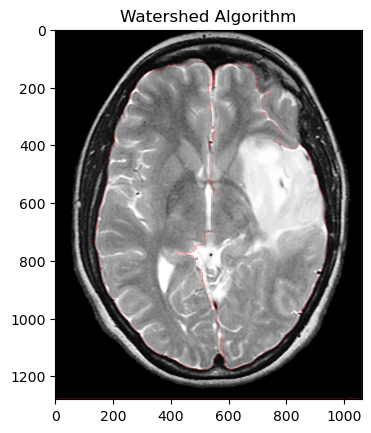

In [104]:
# Connected Components determines the connectivity of blob-like regions in a binary image.
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

img = cv2.imread("MRI.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

plt.title("Watershed Algorithm")
plt.imshow(img)
plt.show()

### Morphological Transform

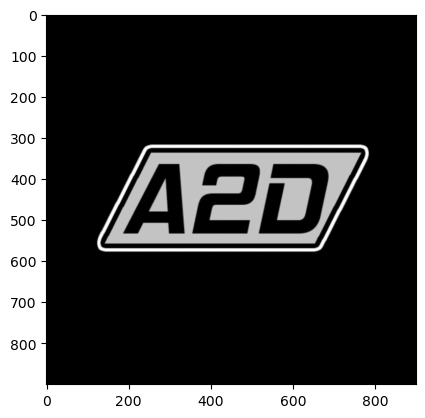

In [105]:
image = cv2.imread("a2d.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")
plt.show()

#### Erosion and Dilation with a Circular Structuring Element

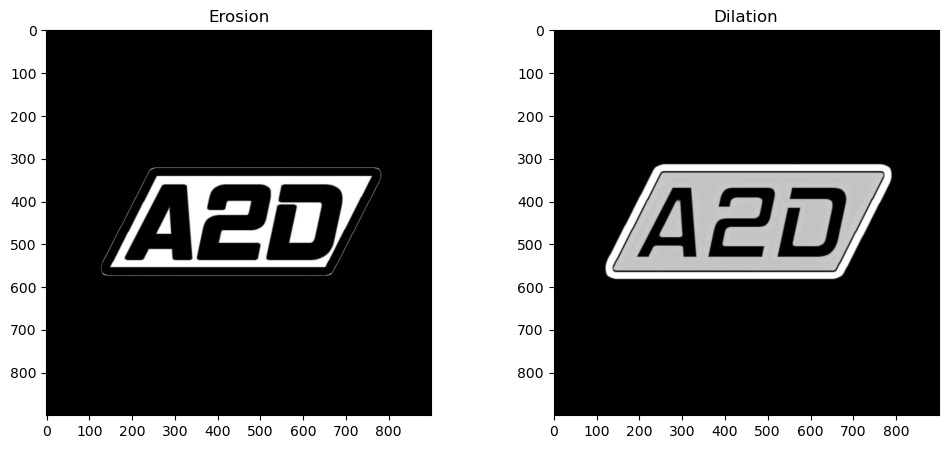

In [106]:
circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

erosion = cv2.erode(image, circle, iterations=2)
dilation = cv2.dilate(image, circle, iterations=2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Erosion")
plt.imshow(erosion, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Dilation")
plt.imshow(dilation, cmap="gray")

plt.show()

#### Erosion and Dilation with a Square Structuring Element

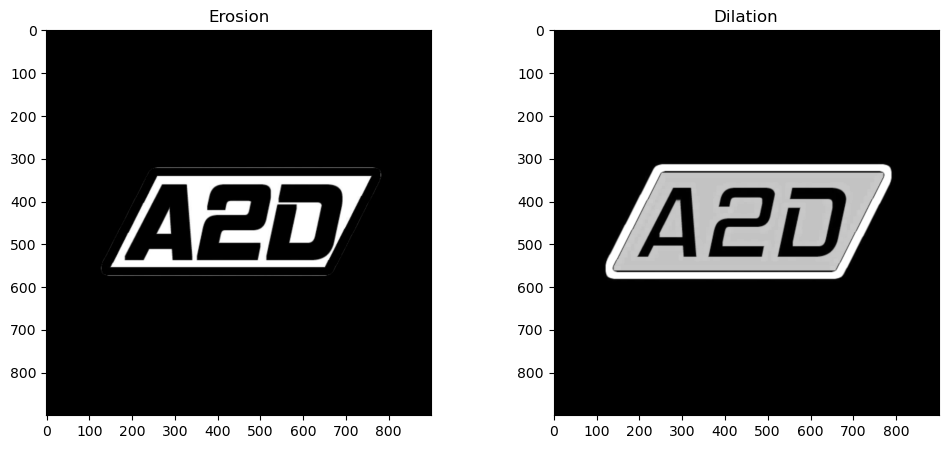

In [107]:
square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

erosion = cv2.erode(image, square, iterations=2)
dilation = cv2.dilate(image, square, iterations=2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Erosion")
plt.imshow(erosion, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Dilation")
plt.imshow(dilation, cmap="gray")

plt.show()

#### Closing and Opening with a Cross Shaped Structuring Element

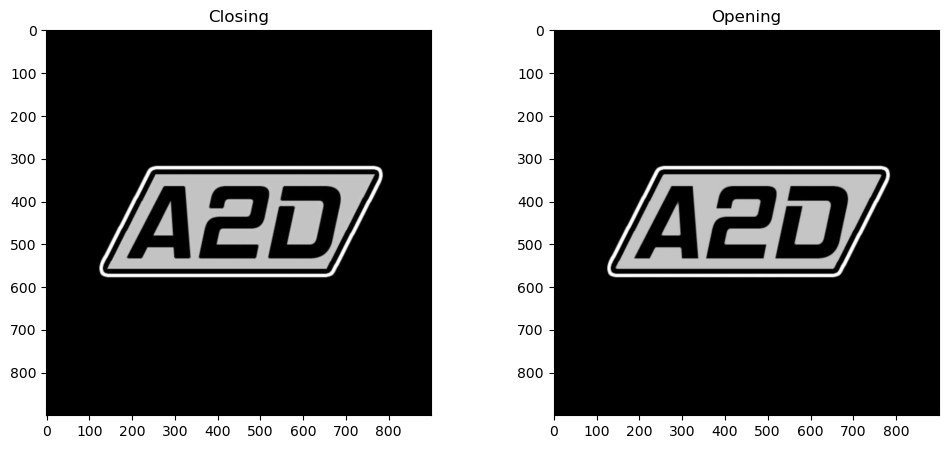

In [108]:
cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, cross)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, cross)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Closing")
plt.imshow(closing, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Opening")
plt.imshow(opening, cmap="gray")

plt.show()

### Mask - Tamil Image

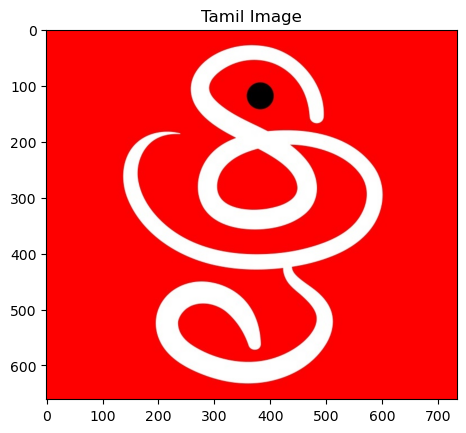

In [109]:
image = cv2.imread("Tamil.jpg")
clr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.title("Tamil Image")
plt.imshow(clr_image)
plt.show()

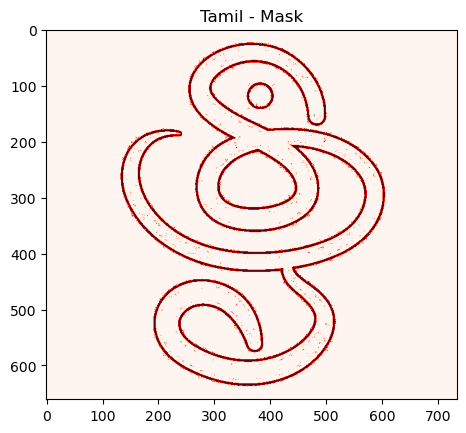

In [116]:
mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.title("Tamil - Mask")
plt.imshow(mask,cmap='Reds' )
plt.show()